In [3]:
import numpy as np
import math
import os
import random
import rasterio
import matplotlib.pyplot as plt

In [117]:
# Working directory looks like this:
#
#├───surfaces
#│   ├───clear
#│   │       hemicylinder_clear.tif
#│   │       hemisphere_clear.tif
#│   │       paraboloid_clear.tif
#│   │
#│   ├───filtered
#│   │   ├───AdaptiveFilter
#│   │   ├───BilateralFilter
#│   │   ├───ConservativeSmoothingFilter
#│   │   ├───EdgePreservingMeanFilter
#│   │   ├───FeaturePreservingSmoothing
#│   │   ├───KNearestMeanFilter
#│   │   ├───LeeSigmaFilter
#│   │   ├───MajorityFilter
#│   │   ├───MeanFilter
#│   │   ├───MedianFilter
#│   │   └───OlympicFilter
#│   └───noisy
#│           hemicylinder_noisy.tif
#│           hemisphere_noisy.tif
#│           paraboloid_noisy.tif

In [45]:
R = 50

arr_sph = np.zeros((2*R+1, 2*R+1), dtype = 'float')
nrows = arr_sph.shape[0]
ncols = arr_sph.shape[1]
#arr1

In [46]:
ncols

101

In [47]:
#hemisphere
for x in range(nrows):
    for y in range(ncols):
        try:
            z = math.sqrt(-(float(x)-R)**2 - (float(y)-R)**2 + R**2)
            arr_sph[x][y] = z
        except ValueError:
            pass

arr_sph
#print(np.array_str(arr1, precision=1))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [48]:
print(np.max(arr_sph), np.min(arr_sph))

50.0 0.0


In [63]:
# Noising
dict_ns = {}
arr_n = np.random.randn(nrows, ncols)
arr_sph_n = arr_sph + arr_n
arr_sph_n_2 = arr_sph + arr_n * 2
arr_sph_n_05 = arr_sph + arr_n * 0.5
dict_ns['sph_n'], dict_ns['sph_n_05'], dict_ns['sph_n_2'] = arr_sph_n, arr_sph_n_05, arr_sph_n_2
dict_ns
#arr_sph_n_10 = arr_sph + arr_n * 10

{'arr_sph_n': array([[ 0.39294377, -0.14598806, -1.34668762, ..., -0.02506185,
         -0.92650074, -1.21990202],
        [-1.38173888, -0.30591014,  2.78578609, ...,  0.89162136,
         -0.35228419,  0.17653706],
        [ 0.14537659,  1.64863051,  0.07828761, ...,  1.16907845,
          0.81324969, -0.89381648],
        ...,
        [ 0.67095371, -0.62293767, -0.71176635, ..., -1.49503221,
         -0.80460949,  0.32354207],
        [-1.19407571,  0.02457797, -0.40163832, ..., -0.5511491 ,
         -0.33713922, -1.04808896],
        [ 0.39030647,  0.41974392,  0.86746364, ...,  0.0820588 ,
         -0.15510218, -0.65127138]]),
 'arr_sph_n_05': array([[ 0.19647188, -0.07299403, -0.67334381, ..., -0.01253093,
         -0.46325037, -0.60995101],
        [-0.69086944, -0.15295507,  1.39289304, ...,  0.44581068,
         -0.17614209,  0.08826853],
        [ 0.0726883 ,  0.82431525,  0.0391438 , ...,  0.58453922,
          0.40662484, -0.44690824],
        ...,
        [ 0.33547685, -0.

In [53]:
print(np.max(arr_sph), np.min(arr_sph))
print(np.max(arr_n), np.min(arr_n))
print(np.max(arr_sph_n_05), np.min(arr_sph_n_05))
print(np.max(arr_sph_n), np.min(arr_sph_n))
print(np.max(arr_sph_n_2), np.min(arr_sph_n_2))
print(np.max(arr_sph_n_10), np.min(arr_sph_n_10))

50.0 0.0
3.807724740486975 -3.8209872628384423
51.03716308524201 -1.5636261717455007
52.445705395773786 -3.1272523434910013
55.506314367142494 -6.254504686982003
81.1551599978743 -31.272523434910013


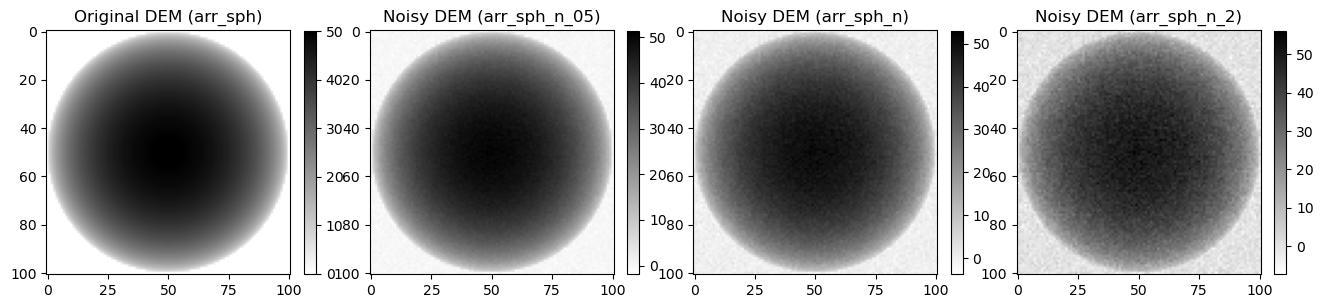

In [51]:
#Vis
fig = plt.figure(figsize=(16, 11))

ax1 = fig.add_subplot(2, 4, 1)
ax1.set_title('Original DEM (arr_sph)')
plt.imshow(arr_sph, cmap='binary')
plt.colorbar(fraction=0.045)

ax2 = fig.add_subplot(2, 4, 2)
ax2.set_title('Noisy DEM (arr_sph_n_05)')
plt.imshow(arr_sph_n_05, cmap='binary')
plt.colorbar(fraction=0.045)

ax3 = fig.add_subplot(2, 4, 3)
ax3.set_title('Noisy DEM (arr_sph_n)')
plt.imshow(arr_sph_n, cmap='binary')
plt.colorbar(fraction=0.045)

ax4 = fig.add_subplot(2, 4, 4)
ax4.set_title('Noisy DEM (arr_sph_n_2)')
plt.imshow(arr_sph_n_2, cmap='binary')
plt.colorbar(fraction=0.045)

plt.show()

In [69]:
# Saving the arrays as a geotiff files
# Jupyter Notebook must be run in administrator mode to be able to overwrite rasters

transform = rasterio.transform.from_origin(0, 0, 1, 1)
crs = rasterio.crs.CRS.from_epsg(4326)

data = arr1

with rasterio.open(r"C:\Users\sasha\abstract_surfaces\surfaces\clear\hemisphere_clear.tif", 
                   'w', 
                   driver='GTiff', 
                   width=data.shape[1], 
                   height=data.shape[0], 
                   count=1, 
                   dtype=str(data.dtype), 
                   crs=crs, 
                   transform=transform, 
                   overwrite=True) as dst:
    dst.write(data, 1)
    

for _ in dict_ns:
    data = dict_ns[_]
    output_path = r"C:\Users\sasha\abstract_surfaces\surfaces\noisy\\" + _ + ".tif"

    with rasterio.open(output_path, 
                       'w', 
                       driver='GTiff', 
                       width=data.shape[1], 
                       height=data.shape[0], 
                       count=1, 
                       dtype=str(data.dtype), 
                       crs=crs, 
                       transform=transform, 
                       overwrite=True) as dst:
        dst.write(data, 1)

In [78]:
#hemicylinder
R = 30

arr_c = np.zeros((int(3*R), int(2*R)+1), dtype = 'float')
nrows = arr_c.shape[0]
ncols = arr_c.shape[1]


for x in range(nrows):
    for y in range(ncols):
        try:
            z = math.sqrt(R**2 - (float(y)-R)**2)
            arr_c[x][y] = z
        except ValueError:
            pass

#arr_c

In [79]:
np.max(arr_c)

30.0

In [82]:
#noising
#numpy.random.randn
arr_n = np.random.randn(nrows, ncols)
arr_cn = arr_c + arr_n * 2
#arr_cn

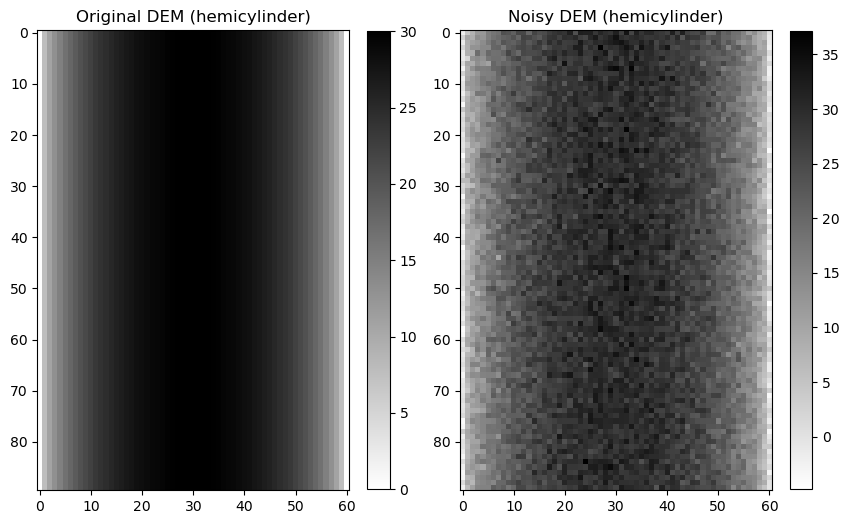

In [83]:
#Vis
fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Original DEM (hemicylinder)')
plt.imshow(arr_c, cmap='binary')
plt.colorbar(fraction=0.065)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Noisy DEM (hemicylinder)')
plt.imshow(arr_cn, cmap='binary')
plt.colorbar(fraction=0.065)
plt.show()

In [84]:
# Saving the arrays as a geotiff files
# Jupyter Notebook must be run as administrator to be able to overwrite rasters

transform = rasterio.transform.from_origin(0, 0, 1, 1)
crs = rasterio.crs.CRS.from_epsg(4326)

data = arr_c

with rasterio.open(r"C:\Users\sasha\abstract_surfaces\surfaces\clear\hemicylinder_clear.tif", 
                   'w', 
                   driver='GTiff', 
                   width=data.shape[1], 
                   height=data.shape[0], 
                   count=1, 
                   dtype=str(data.dtype), 
                   crs=crs, 
                   transform=transform, 
                   overwrite=True) as dst:
    dst.write(data, 1)
    
data = arr_cn
    
with rasterio.open(r"C:\Users\sasha\abstract_surfaces\surfaces\noisy\hemicylinder_noisy.tif", 
                   'w', 
                   driver='GTiff', 
                   width=data.shape[1], 
                   height=data.shape[0], 
                   count=1, 
                   dtype=str(data.dtype), 
                   crs=crs, 
                   transform=transform, 
                   overwrite=True) as dst:
    dst.write(data, 1)

In [106]:
#hyperbolic paraboloid
# z = (x**2 / a**2) - (y**2 / b**2)

a1 = 100
b1 = 100

arr_hp = np.zeros((int(2*a1)+1, int(2*a1)+1), dtype = 'float')
nrows = arr_hp.shape[0]
ncols = arr_hp.shape[1]


for x in range(nrows):
    for y in range(ncols):
        try:
            z = (x**2 / a1**2) - (y**2 / b1**2)
            arr_hp[x][y] = z
        except ValueError:
            pass

#arr_hp

In [109]:
#noising
#numpy.random.randn
arr_n = np.random.randn(nrows, ncols)
arr_hpn = arr_hp + arr_n * 0.5
#arr_hpn

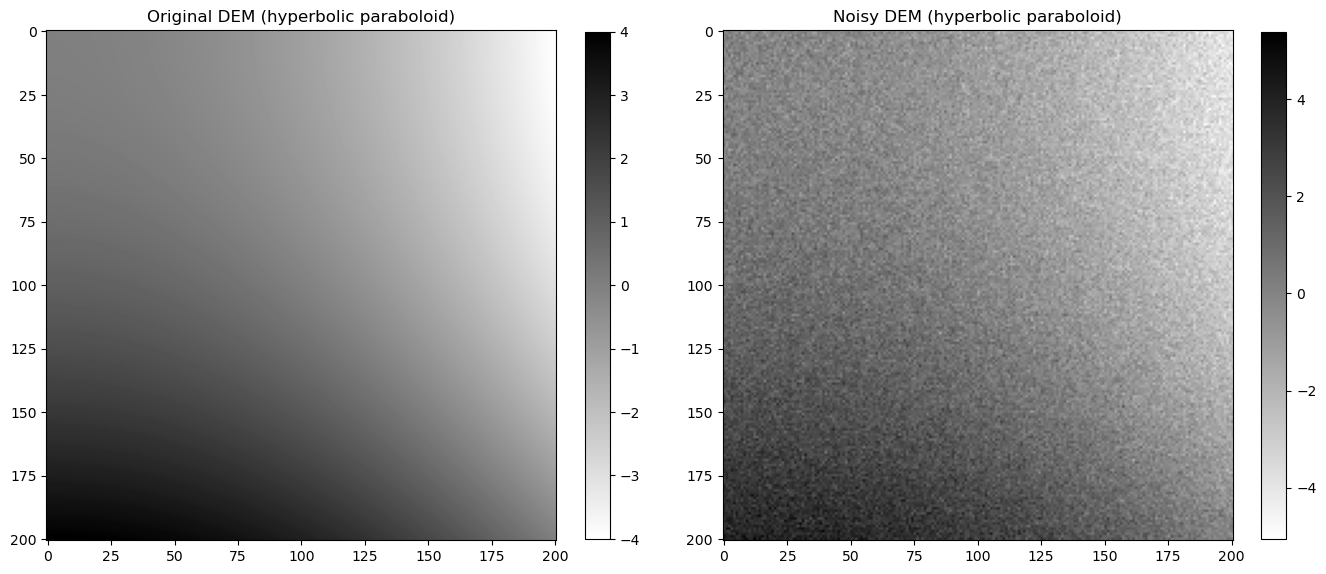

In [116]:
#Vis
fig = plt.figure(figsize=(16, 11))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title('Original DEM (hyperbolic paraboloid)')
plt.imshow(arr_hp, cmap='binary')
plt.colorbar(fraction=0.045)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title('Noisy DEM (hyperbolic paraboloid)')
plt.imshow(arr_hpn, cmap='binary')
plt.colorbar(fraction=0.045)

#fig.suptitle

plt.show()

In [112]:
# Saving the arrays as a geotiff files
# Jupyter Notebook must be run as administrator to be able to overwrite rasters

transform = rasterio.transform.from_origin(0, 0, 1, 1)
crs = rasterio.crs.CRS.from_epsg(4326)

data = arr_hp

with rasterio.open(r"C:\Users\sasha\abstract_surfaces\surfaces\clear\paraboloid_clear.tif", 
                   'w', 
                   driver='GTiff', 
                   width=data.shape[1], 
                   height=data.shape[0], 
                   count=1, 
                   dtype=str(data.dtype), 
                   crs=crs, 
                   transform=transform, 
                   overwrite=True) as dst:
    dst.write(data, 1)
    
data = arr_hpn
    
with rasterio.open(r"C:\Users\sasha\abstract_surfaces\surfaces\noisy\paraboloid_noisy.tif", 
                   'w', 
                   driver='GTiff', 
                   width=data.shape[1], 
                   height=data.shape[0], 
                   count=1, 
                   dtype=str(data.dtype), 
                   crs=crs, 
                   transform=transform, 
                   overwrite=True) as dst:
    dst.write(data, 1)

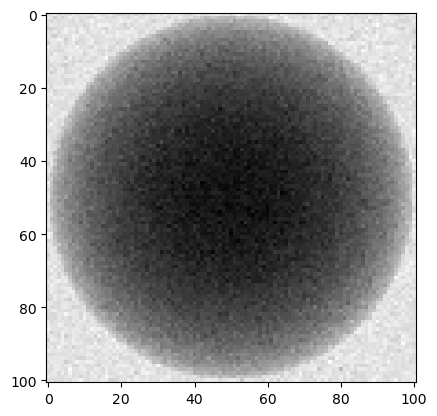

In [71]:
# Checking if the raster is saved correctly
with rasterio.open(r"C:\Users\sasha\abstract_surfaces\surfaces\noisy\arr_sph_n_2.tif", 'r') as ds:
    arr = ds.read()
    
plt.imshow(arr[0], cmap='binary')
plt.show()